<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b>👩🏻‍💻 Recommendation system </b></h1></center>

<h8><b style="color:red; font-size: 18px;">To create a recommendation system for users based on the data provided, you can use collaborative filtering techniques. Collaborative filtering recommends items by identifying users who have similar preferences and suggesting items that they have liked or purchased. </b></h8>

<h8><b style="color:red; font-size: 18px;">1) Singular value decomposition (SVD)<br>
2) Product Description Recommendation System <br>
3) Recommendation System with Cosine Similarity<br>
4) Collaborative Filtering<br>
5) Content-based Filtering<br>
6) Matrix Factorization<br>
7) Hybrid Methods<br>
8) Neighborhood-based Methods<br>
9) Deep Learning-based Methods<br>
10) Model-based Methods<br>
11) Evaluation Metrics<br>
 </b></h8>

<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b>1️⃣ Singular value decomposition (SVD) </b></h1></center>

In [14]:
# Let's import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, precision_score, recall_score, f1_score, average_precision_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
# from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [81]:
# Let's load dataset
rb = pd.read_csv('ratings_Beauty.csv')
rb = rb[:10000]

In [82]:
# Let's edit timestamp
rb['Timestamp'] = rb['Timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

In [17]:
# Let's look at shape of dataframe
rb.shape

(10000, 4)

In [18]:
# Let's look at first 5 row
rb.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,2013-05-28
1,A3JM6GV9MNOF9X,0558925278,3.0,2012-12-14
2,A1Z513UWSAAO0F,0558925278,5.0,2014-07-07
3,A1WMRR494NWEWV,0733001998,4.0,2013-10-24
4,A3IAAVS479H7M7,0737104473,1.0,2010-05-19


In [19]:
# Let's look at count of product and sort by userid
product_group = rb.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
product_group_sorted = product_group.sort_values(by='UserId', ascending=False)
product_group_sorted.head(5)

,ProductId,UserId
704,B00004TUBL,558
834,B000052YM7,412
719,B000050B6U,377
873,B000052YP6,341
843,B000052YMR,313


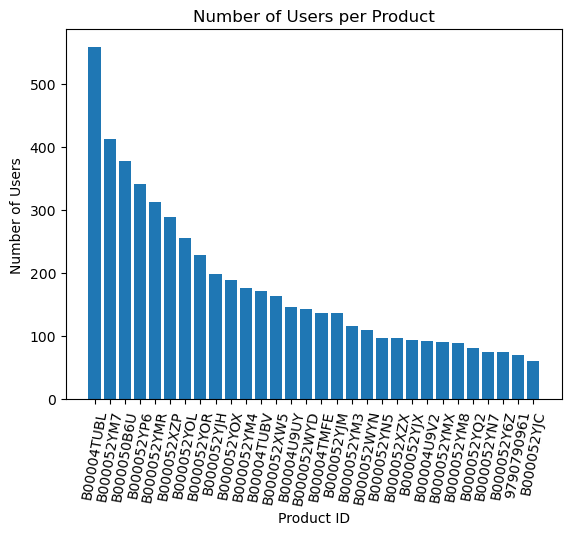

In [20]:
# Let's look at distribution in graph
plt.bar(product_group_sorted.head(30)['ProductId'], product_group_sorted.head(30)['UserId'])
plt.xlabel('Product ID')
plt.ylabel('Number of Users')
plt.title('Number of Users per Product')
plt.xticks(rotation=80)
plt.show()

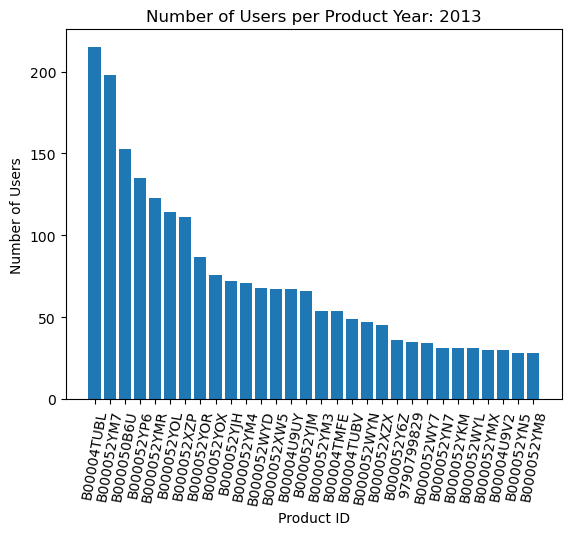

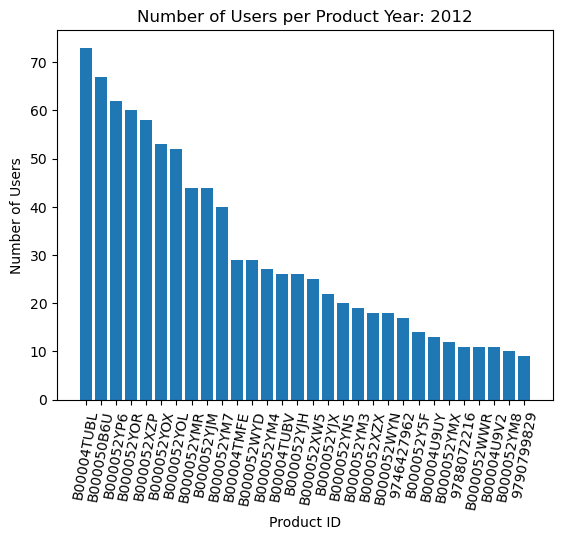

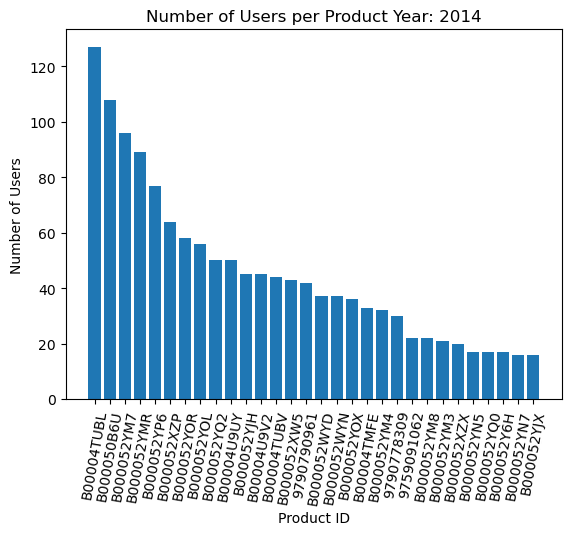

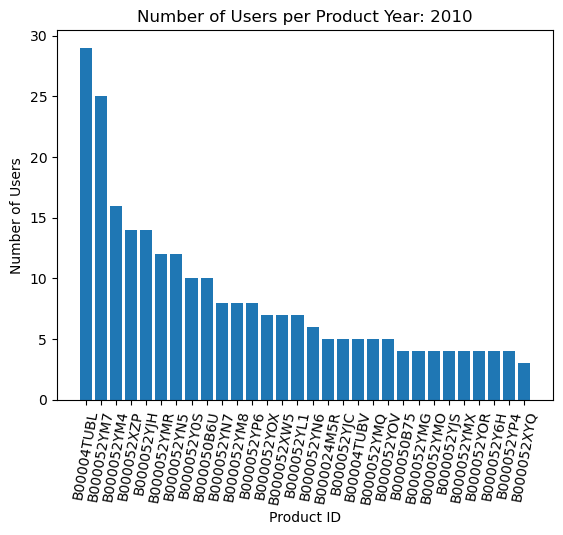

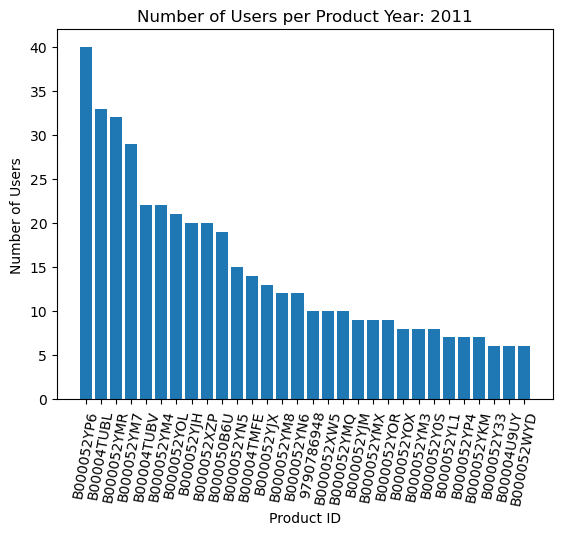

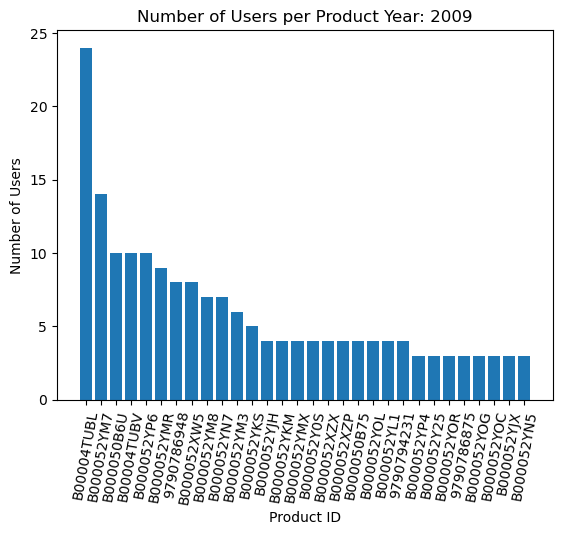

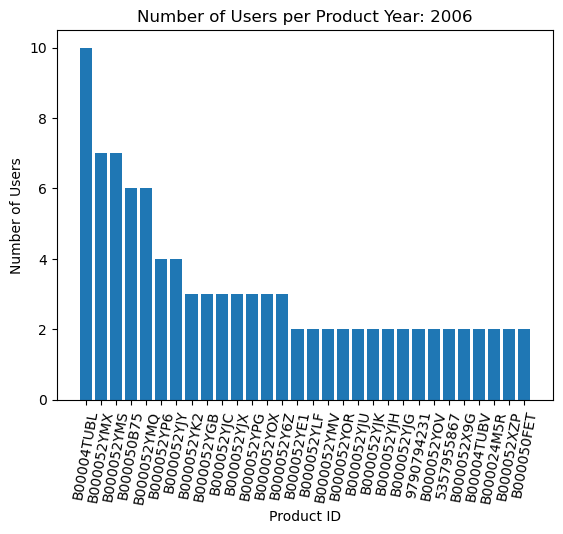

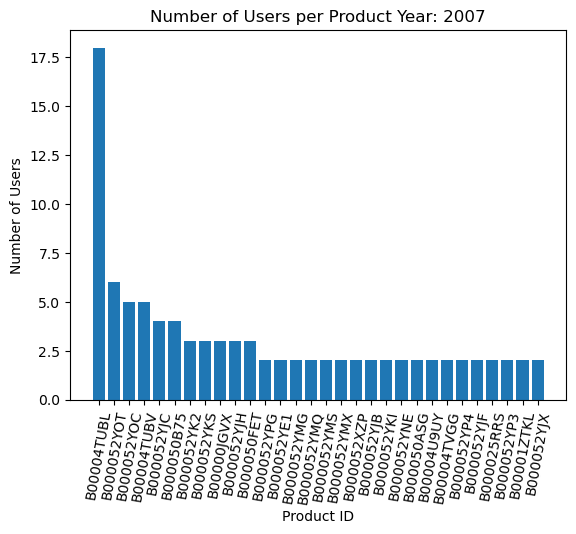

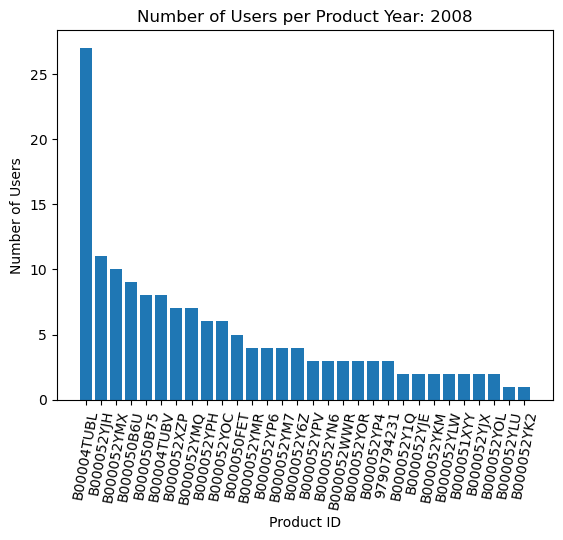

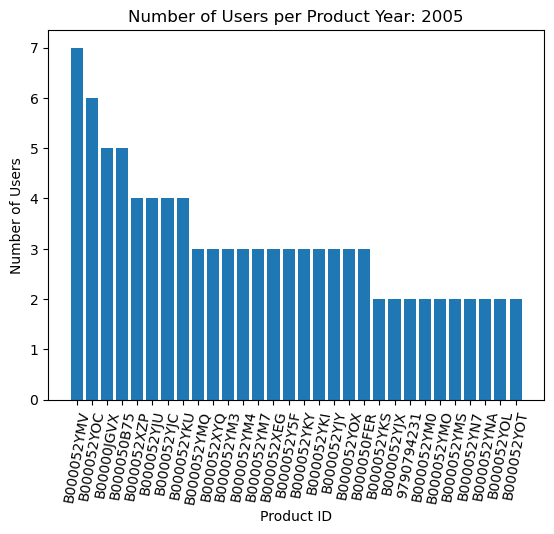

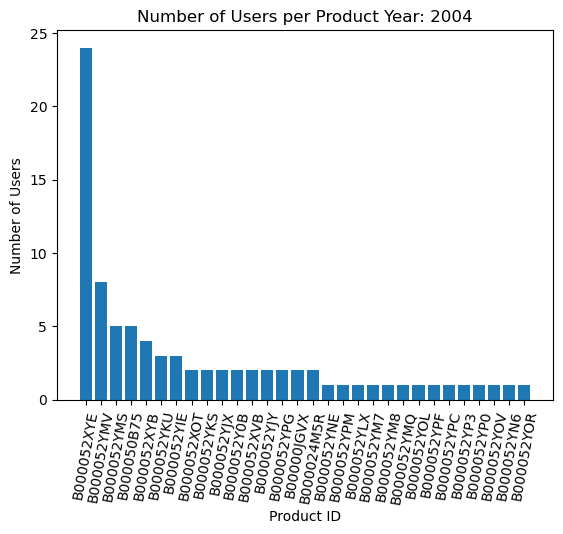

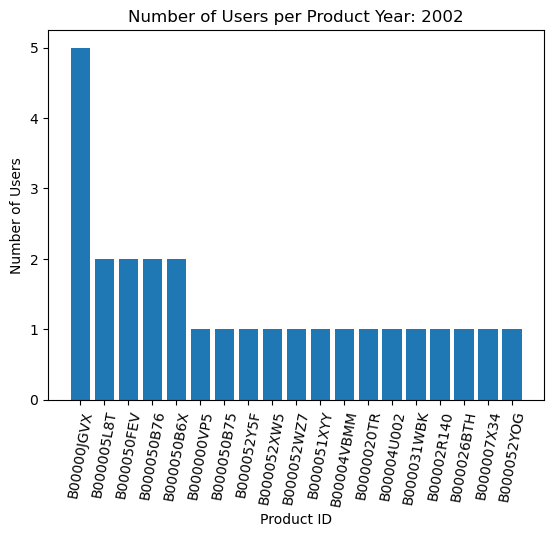

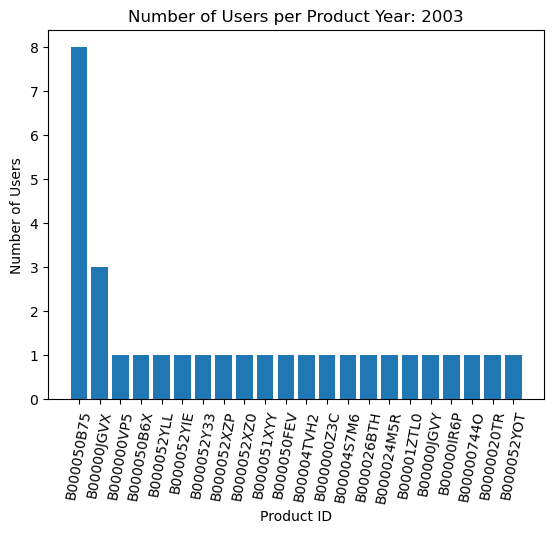

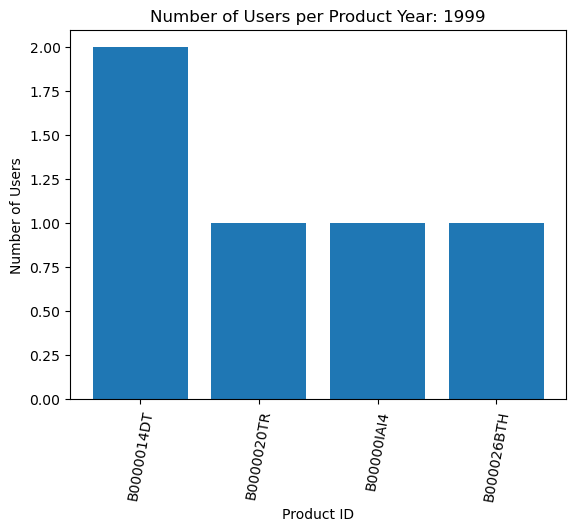

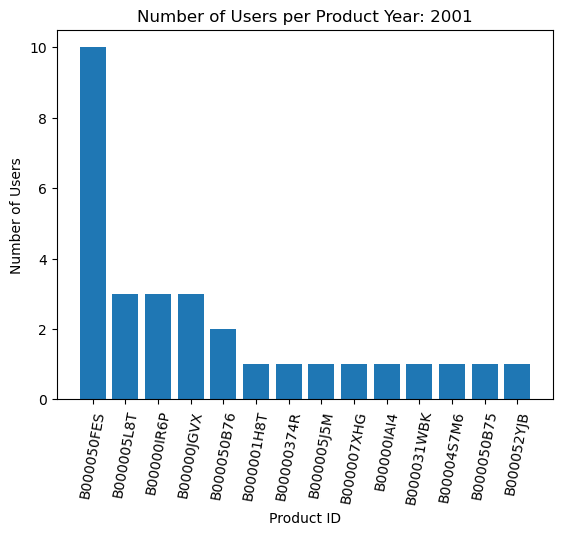

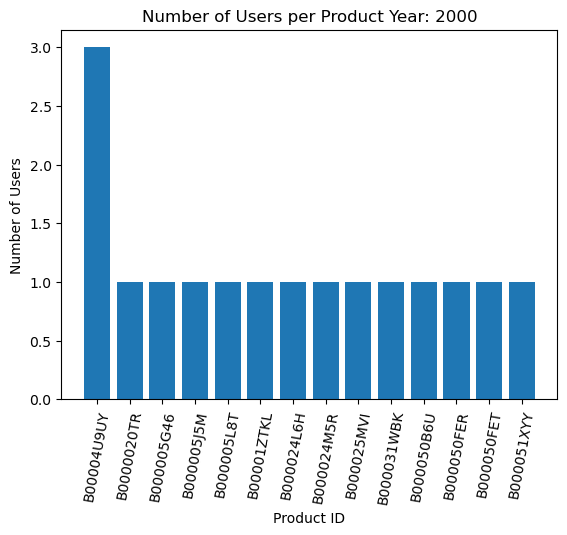

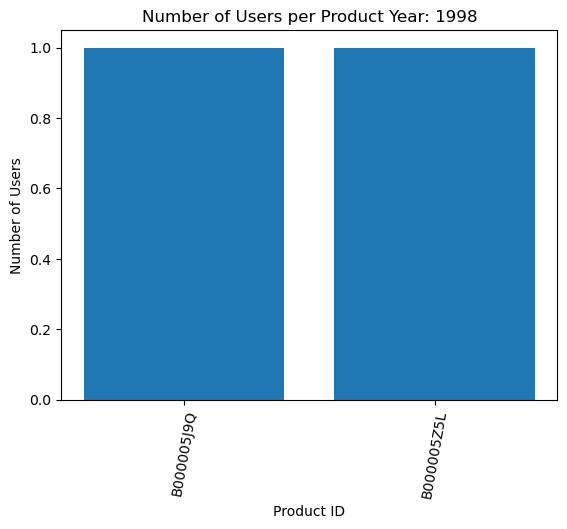

In [21]:
# Okey great!!! Now let's look at yearly most useing product
for i in rb['Timestamp'].dt.year.unique():
  rb1 = rb[rb['Timestamp'].dt.year == i]
  product_group = rb1.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
  product_group_sorted = product_group.sort_values(by='UserId', ascending=False)
  plt.bar(product_group_sorted.head(30)['ProductId'], product_group_sorted.head(30)['UserId'])
  plt.xlabel('Product ID')
  plt.ylabel('Number of Users')
  plt.title(f'Number of Users per Product Year: {i}')
  plt.xticks(rotation=80)
  plt.show()

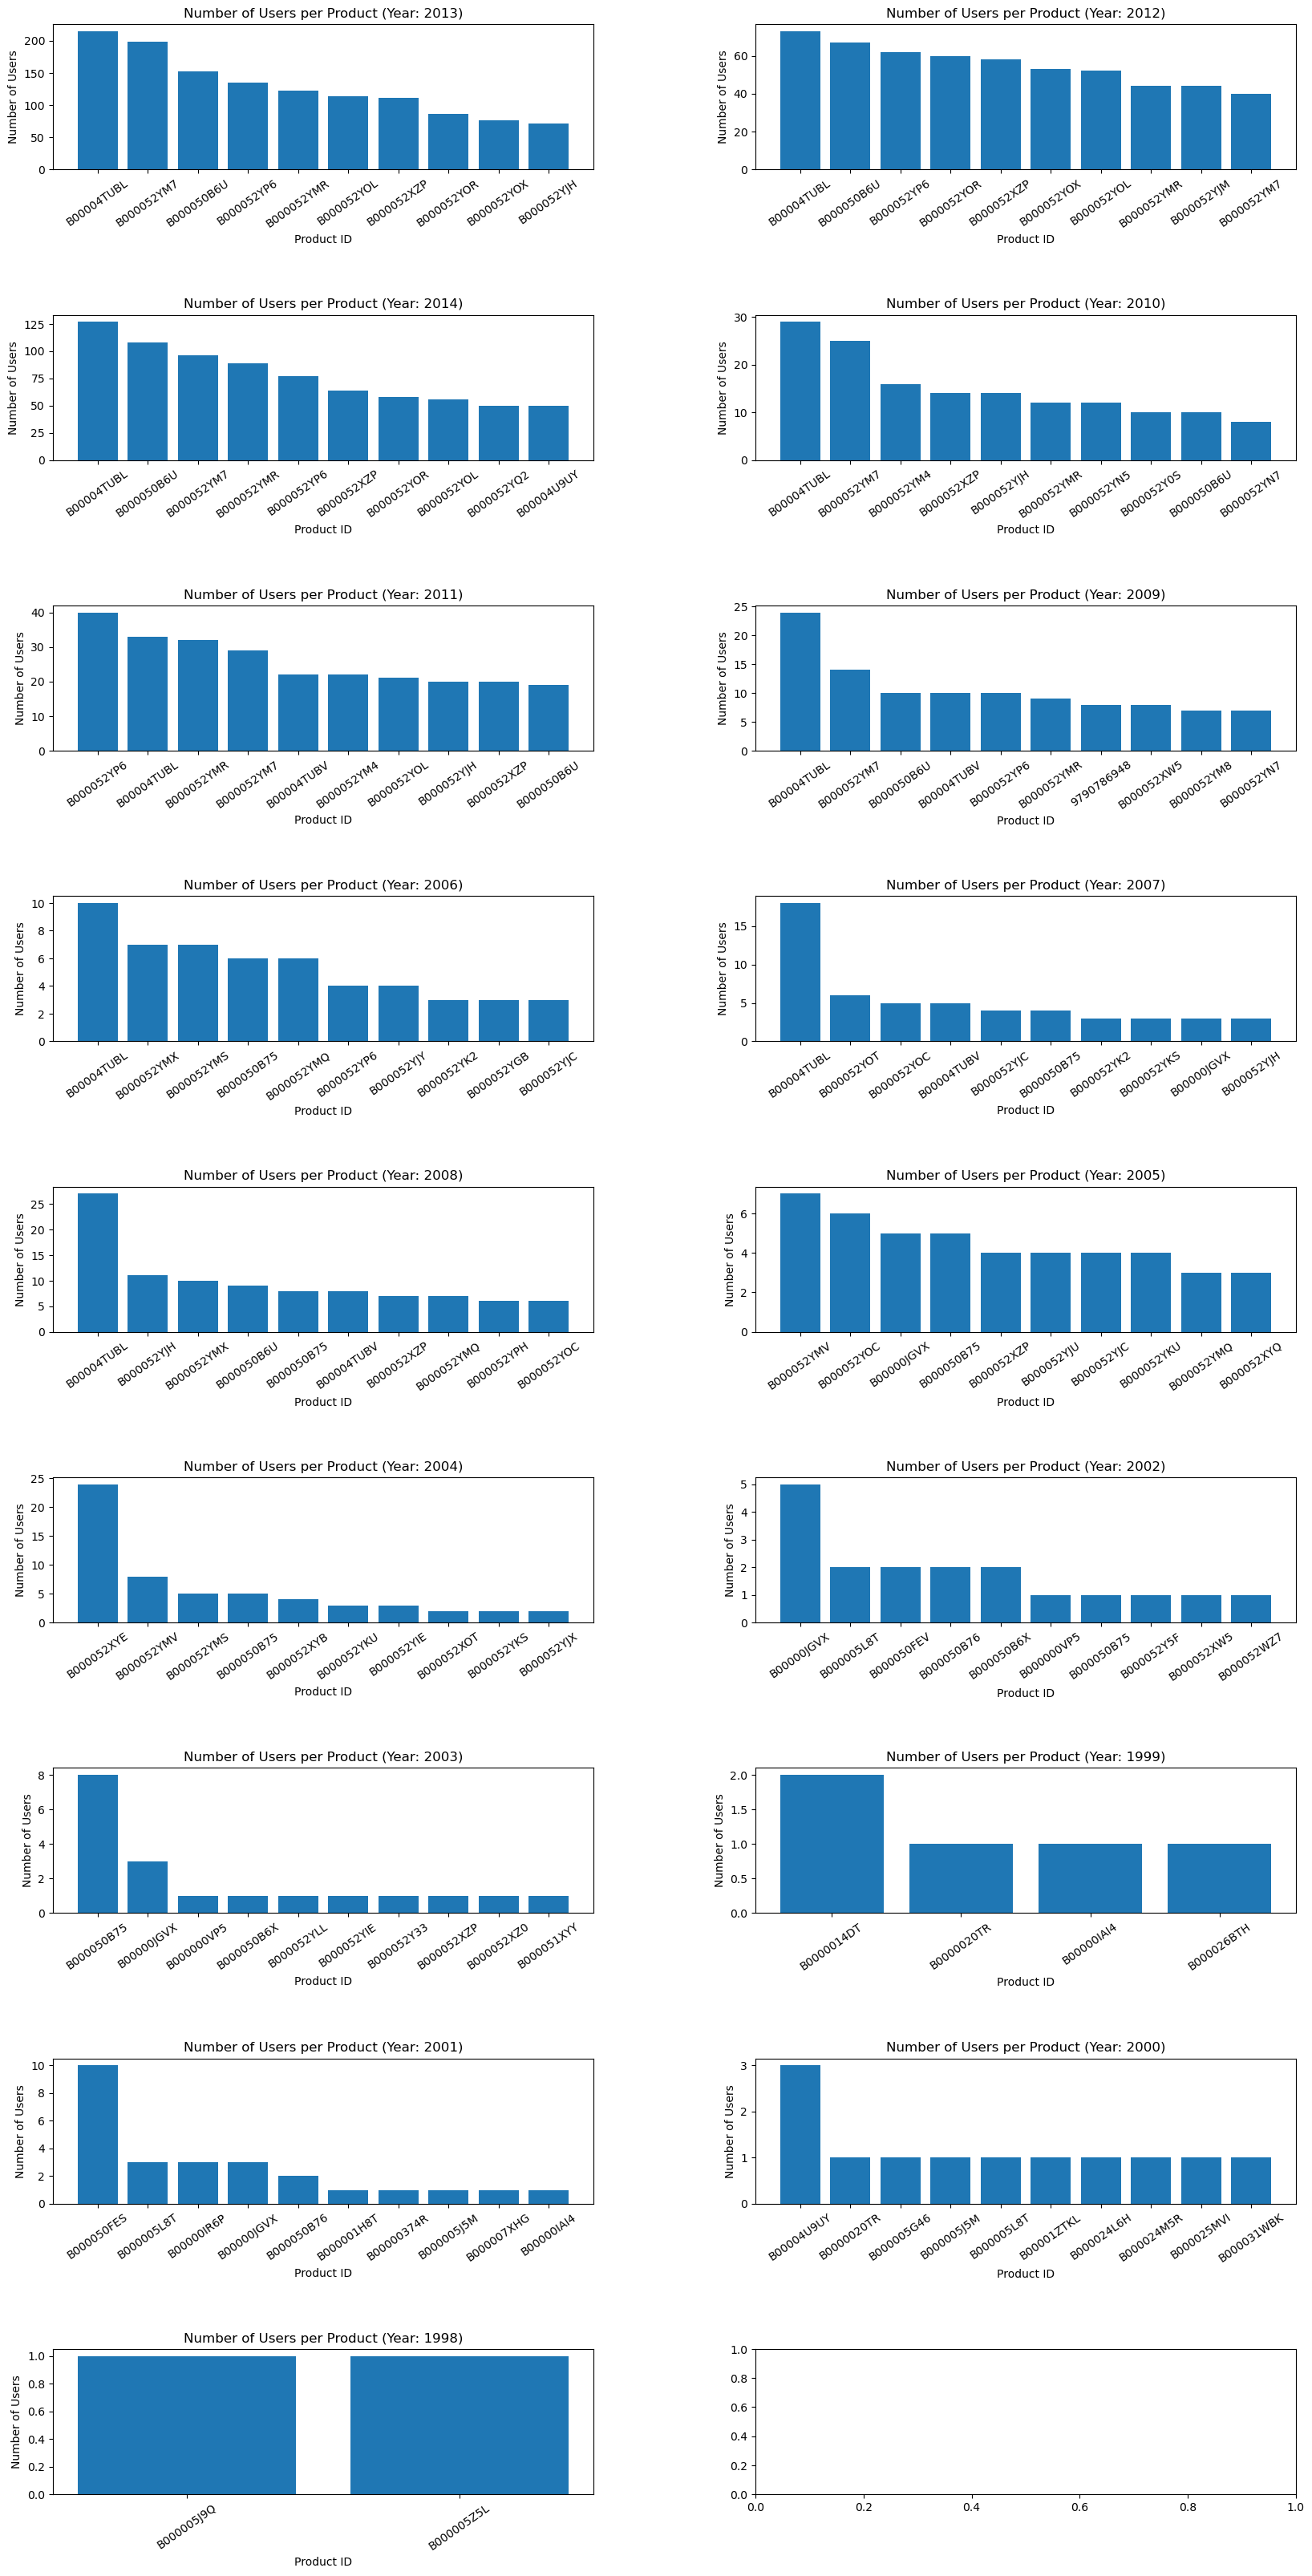

In [22]:
# Let's create as subplot
unique_years = rb['Timestamp'].dt.year.unique()

num_rows = (len(unique_years) + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 40))

if num_rows > 1:
    axs = axs.flatten()

for i, year in enumerate(unique_years):
    ax = axs[i]
    rb1 = rb[rb['Timestamp'].dt.year == year]
    product_group = rb1.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
    product_group_sorted = product_group.sort_values(by='UserId', ascending=False)
    ax.bar(product_group_sorted.head(10)['ProductId'], product_group_sorted.head(10)['UserId'])
    ax.set_xlabel('Product ID')
    ax.set_ylabel('Number of Users')
    ax.set_title(f'Number of Users per Product (Year: {year})')
    ax.tick_params(axis='x', rotation=35)

# Adjust padding between subplots
plt.subplots_adjust(hspace=1, wspace=0.3)

plt.show()

In [24]:
# Let's do pivot table ( user id and product id )
ratings_beauty_matrix = rb.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)

print('Shape Matrix: ', ratings_beauty_matrix.shape)
ratings_beauty_matrix.head()

Shape Matrix:  (9697, 886)


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# let's transpose
rb_t = ratings_beauty_matrix.T
rb_t.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(rb_t)
decomposed_matrix.shape

(886, 10)

In [27]:
# Let's create correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [28]:
# Let's look at random index size
rb_t.index[53]

'1457982633'

In [29]:
# Let's look at example for recommendation
pattern = rb_t.index[23]
product_names = list(rb_t.index)
product_ID = product_names.index(pattern)
product_ID

23

In [30]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [31]:
# Let's look at recommendation items
count = int(input("How many items do you want to see? : "))
Recommend = list(rb_t.index[correlation_product_ID > 0.90])
# Let's remove the items which it already are bought by the customer
Recommend.remove(pattern)

for i,y in enumerate(Recommend[0:count]):
    print(f'Item {i+1}: ',y)

How many items do you want to see? : 5
Item 1:  1304146537
Item 2:  1304168522
Item 3:  1304196070
Item 4:  1304482596
Item 5:  1304495396


In [32]:
# Let's create function for optimaztion of process

def recommendation_program(index, how_many_first_recommendation_product = 3):
    pattern = rb_t.index[53]
    product_names = list(rb_t.index)
    product_ID = product_names.index(pattern)
    correlation_product_ID = correlation_matrix[product_ID]
    correlation_product_ID.shape
    Recommend = list(rb_t.index[correlation_product_ID > 0.90])
    Recommend.remove(pattern)
    n = how_many_first_recommendation_product
    products = Recommend[0:n]
    print(f'• User id: {index}')
    print('• User recommended products:')
    for i,v in enumerate(products):
      print(f'Product {i+1}: {v}')

In [34]:
# Let's practice
# So that we enter index of user and product count for recommendation
recommendation_program(43,10)

• User id: 43
• User recommended products:
Product 1: 6175005570
Product 2: 6175005589
Product 3: 9759091062
Product 4: 9790770391
Product 5: 9790774389
Product 6: 9790774443
Product 7: 9790775571
Product 8: 9790779062
Product 9: 979079326X
Product 10: 9790794827


In [21]:
# Let's create function for optimization of process
app_continue = True
while app_continue:
    def recommendation_program(index, count_products=3):
        pattern = rb_t.index[53]
        product_names = list(rb_t.index)
        product_ID = product_names.index(pattern)
        correlation_product_ID = correlation_matrix[product_ID]
        Recommend = list(rb_t.index[correlation_product_ID > 0.90])
        Recommend.remove(pattern)
        n = count_products
        products = Recommend[0:n]
        print(f'• User id: {index}')
        print('• User recommended products:')
        for i, v in enumerate(products):
            print(f'Product {i+1}: {v}')
    print('\n')
    while True:
        index = input('Please enter user id: ')
        if len(index) == 10:
            break
        else:
            print("User ID should be exactly 10 characters. Please try again: ")

    while True:
        count_products = input('How many recommendation products do you want to see?: ')
        if count_products.isdigit():
            break
        else:
            print("Please enter a valid number. Please try again: ")
    count_products = int(count_products)

    print('\n\n|================= Report Answer ===================|\n')
    recommendation_program(index, count_products)

    print('\n')
    while True:
        continue_choice = input('Do you want to continue using the app? (True/False): ')
        if continue_choice.lower() in ['true','false']:
            break
        else:
            print("Please enter a valid number. Please try again: ")
    app_continue = (continue_choice.strip().lower() == 'true')



Please enter user id: 1457982633
How many recommendation products do you want to see?: 4


|================= Report Answer ===================|

• User id: 1457982633
• User recommended products:
Product 1: 0762451459
Product 2: 4057362886
Product 3: 4057362894
Product 4: 4057362967


Do you want to continue using the app? (True/False): False


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b>2️⃣ Product Description Recommendation System </b></h1></center>

In [36]:
product_descriptions = pd.read_csv('product_descriptions.csv')
print(product_descriptions.shape)

(124428, 2)


In [38]:
# Let's drop null values
product_descriptions = product_descriptions.dropna()
product_descriptions.head(3)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...


In [39]:
# Let's get 500 row and look at 10 row
product_descriptions1 = product_descriptions.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [40]:
# Let's convert vectorizer and detect stopwords
vectorizer = TfidfVectorizer(stop_words='english')
rs = vectorizer.fit_transform(product_descriptions1["product_description"])

In [41]:
# Let's seperate clusters
rs1 = rs #-- copy dataframe
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

In [44]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [84]:
# Let's seperate rs1 clusters and show in visualization
y_kmeans = kmeans.fit_predict(rs1)
plt.plot(y_kmeans, ".")
plt.show()

In [51]:
# Let's show output
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [83]:
# Let's show clusters
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(rs)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Using get_feature_names_out() instead of get_feature_names()
for i in range(true_k):
    print_cluster(i)

In [ ]:
# Let's predict value after vectorizer
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [ ]:
# Let's practise model
show_recommendations("single")

Cluster 7:
 20
 toilet
 steel
 metal
 water
 bowl
 flush
 sink
 features
 single


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 3️⃣ Recommendation System with Cosine Similarity</b></h1></center>

In [53]:
# Let's load data
df = pd.DataFrame(rb)
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,2013-05-28
1,A3JM6GV9MNOF9X,0558925278,3.0,2012-12-14
2,A1Z513UWSAAO0F,0558925278,5.0,2014-07-07
3,A1WMRR494NWEWV,0733001998,4.0,2013-10-24
4,A3IAAVS479H7M7,0737104473,1.0,2010-05-19


In [54]:
# Let's create user-item matrix
user_item_matrix = df.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)

# Calculate similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Function to generate recommendations for a user
def generate_recommendations(user_id, top_n=5):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]  # Let's exclude the user itself
    recommendations = []
    for similar_user_index in similar_users_indices:
        similar_user_id = user_item_matrix.index[similar_user_index]
        similar_user_ratings = user_item_matrix.iloc[similar_user_index]
        user_ratings = user_item_matrix.loc[user_id]
        recommendations.extend(similar_user_ratings[user_ratings == 0].sort_values(ascending=False).index[:top_n])
    return recommendations

# Generate recommendations for a user
index = int(input('• Please enter index of user id for recommendation process: '))
count = int(input('• Please enter count of recommendation items: '))
user_id = user_item_matrix.index[index]
recommendations = generate_recommendations(user_id)
print(f"-Result: \n• Top {count} Recommendations for user {user_id}: {recommendations[:count]}")

• Please enter index of user id for recommendation process: 4
• Please enter count of recommendation items: 4
-Result: 
• Top 4 Recommendations for user A0505229A7NSH3FRXRR4: ['0205616461', '9790798695', '9790797710', '9790797818']


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 4️⃣ Collaborative Filtering </b></h1></center>

In [55]:
# Let's sample user-item interaction data
df = pd.DataFrame(rb[['UserId','ProductId','Rating']])

In [58]:
# Step 1: Create user-item matrix for user-based collaborative filtering
user_item_matrix = df.pivot_table(index='UserId', columns='ProductId', values='Rating', fill_value=0)

# Step 2: Calculate user similarity
user_similarity = cosine_similarity(user_item_matrix)

# Function to generate recommendations using user-based collaborative filtering
def user_based_cf(user_id, top_n=2):
    if user_id not in user_item_matrix.index:
        return "User not found in the dataset."

    user_index = user_item_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]  # Exclude the user itself
    recommendations = []
    for similar_user_index in similar_users_indices:
        similar_user_id = user_item_matrix.index[similar_user_index]
        similar_user_ratings = user_item_matrix.iloc[similar_user_index]
        user_ratings = user_item_matrix.loc[user_id]
        recommendations.extend(similar_user_ratings[user_ratings == 0].sort_values(ascending=False).index[:top_n])
    return recommendations

# Function to generate recommendations using item-based collaborative filtering
def item_based_cf(user_id, top_n=2):
    if user_id not in user_item_matrix.index:
        return "User not found in the dataset."

    user_ratings = user_item_matrix.loc[user_id]
    recommendations = []
    for item in user_ratings.index:
        similar_items = user_item_matrix.corrwith(user_item_matrix[item])
        similar_items = similar_items.sort_values(ascending=False)
        similar_items = similar_items.drop(item)
        recommendations.extend(similar_items.index[:top_n])
    return recommendations

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_item_matrix.index[index]
user_based_recommendations = user_based_cf(user_id)
item_based_recommendations = item_based_cf(user_id)

print(f"User-based CF recommendations for {user_id}: {user_based_recommendations[:3]}")
print(f"Item-based CF recommendations for {user_id}: {item_based_recommendations[:3]}")

<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b>5️⃣ Content-based Filtering </b></h1></center>

In [59]:
# Let's load data (item descriptions)
df = pd.DataFrame(product_descriptions1)
df.columns = ['Item','Description']

In [60]:
# Let's look at dataframe
df.head()

,Item,Description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [63]:
# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Description'])

# Clustering (using KMeans)
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(tfidf_matrix)

# Function to recommend items based on input words
def content_based_recommendation(input_words):
    input_vector = vectorizer.transform([input_words])
    cluster_label = kmeans.predict(input_vector)[0]
    similar_items_indices = [i for i, label in enumerate(clusters) if label == cluster_label]
    similar_items = df.loc[similar_items_indices, 'Item']
    return similar_items

# Example usage
input_words = "highly recommended"
recommended_items = content_based_recommendation(input_words)
print(f"Recommended items based on input words '{input_words}': {recommended_items}")

<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 6️⃣ Matrix Factorization</b></h1></center>

In [64]:
# Sample user-item interaction data
df = pd.DataFrame(rb.iloc[:,:-1])
df.columns = ['User','Item','Rating']

In [65]:
# Create user-item matrix
user_item_matrix = df.pivot_table(index='User', columns='Item', values='Rating', fill_value=0)

# Perform Matrix Factorization using SVD
svd = TruncatedSVD(n_components=2)  # Choose the number of latent factors
user_factors = svd.fit_transform(user_item_matrix)
item_factors = svd.components_

# Reconstruct the user-item interaction matrix
predicted_ratings = np.dot(user_factors, item_factors)

# Example usage: Recommend items for a given user
def recommend_items(user_id):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_ratings = predicted_ratings[user_index]
    recommended_items_indices = user_ratings.argsort()[::-1]  # Sort in descending order of predicted ratings
    recommended_items = user_item_matrix.columns[recommended_items_indices]
    return recommended_items

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_item_matrix.index[index]
recommended_items = recommend_items(user_id)
print(f"Recommended items for {user_id}: {recommended_items[:2]}")

• Please enter index of user id for recommendation process: 5
Recommended items for A05492663T95KW63BR75K: Index(['B00004TUBL', 'B000052XW5'], dtype='object', name='Item')


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 7️⃣ Hybrid Methods </b></h1></center>

In [66]:
# Sample user-item interaction data
user_item_df = pd.DataFrame(rb.iloc[:,:-1])
user_item_df.columns = ['User','Item','Rating']

# Let's load data (item descriptions)
item_features_df = pd.DataFrame(product_descriptions)
item_features_df.columns = ['Item','Description']

In [68]:
# Collaborative Filtering
def collaborative_filtering(user_id):
    user_ratings = user_item_df[user_item_df['User'] == user_id].set_index('Item')['Rating']
    return user_ratings

# Content-based Filtering
def content_based_filtering(input_words):
    similarities = {}
    input_vector = vectorizer.transform([input_words])
    for index, row in item_features_df.iterrows():
        item_description = row['Description']
        item_vector = vectorizer.transform([item_description])
        similarity = cosine_similarity(input_vector, item_vector)[0][0]
        similarities[row['Item']] = similarity
    return similarities

# Hybrid Recommendation
def hybrid_recommendation(user_id, input_words):
    collaborative_results = collaborative_filtering(user_id)
    content_based_results = content_based_filtering(input_words)

    hybrid_scores = {}
    for item, collaborative_rating in collaborative_results.items():
        content_based_score = content_based_results.get(item, 0)  # If item not found, default to 0
        hybrid_score = 0.7 * collaborative_rating + 0.3 * content_based_score  # Weighted combination
        hybrid_scores[item] = hybrid_score

    recommended_items = sorted(hybrid_scores, key=hybrid_scores.get, reverse=True)
    return recommended_items

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_item_matrix.index[index]
input_words = "great quality"
recommended_items = hybrid_recommendation(user_id, input_words)
print(f"Hybrid recommendations for {user_id} based on input words '{input_words}': {recommended_items}")

<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 8️⃣ Neighborhood-based Methods </b></h1></center>

In [85]:
# Sample user-item interaction data
user_item_df = pd.DataFrame(rb.iloc[:,:-1])
user_item_df.columns = ['User','Item','Rating']

In [88]:
# User-item matrix
user_item_matrix = user_item_df.pivot_table(index='User', columns='Item', values='Rating', fill_value=0)

# Neighborhood-based recommendation using k-NN
def k_nearest_neighbors(user_id, k=2):
    # Fit k-NN model
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(user_item_matrix.values)

    # Find k-nearest neighbors
    user_index = user_item_matrix.index.get_loc(user_id)
    distances, indices = knn.kneighbors([user_item_matrix.iloc[user_index]])

    # Get recommendations from nearest neighbors
    recommendations = []
    for neighbor_index in indices.flatten()[1:]:  # Exclude the user itself
        neighbor_user_id = user_item_matrix.index[neighbor_index]
        neighbor_ratings = user_item_df[user_item_df['User'] == neighbor_user_id].set_index('Item')['Rating']
        for item, rating in neighbor_ratings.items():
            if rating > 0 and item not in user_item_matrix.columns:
                recommendations.append(item)
    return recommendations

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_item_matrix.index[index]
k = 2
recommended_items = k_nearest_neighbors(user_id, k)
print(f"Recommended items for {user_id} using k-NN with k={k}: {recommended_items}")

• Please enter index of user id for recommendation process: 7
Recommended items for A07410232KYRFR25CIUGJ using k-NN with k=2: []


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 9️⃣ Deep Learning-based Methods</b></h1></center>

In [89]:
# Sample user-item interaction data
df = pd.DataFrame(rb.iloc[:,:-1])
df.columns = ['User','Item','Rating']

In [92]:
# Encode users and items
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
df['User'] = user_encoder.fit_transform(df['User'])
df['Item'] = item_encoder.fit_transform(df['Item'])

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Neural network-based recommendation model
num_users = len(user_encoder.classes_)
num_items = len(item_encoder.classes_)
embedding_dim = 10

# User embedding
user_input = Input(shape=(1,))
user_embedding = Embedding(num_users, embedding_dim)(user_input)
user_embedding = Flatten()(user_embedding)

# Item embedding
item_input = Input(shape=(1,))
item_embedding = Embedding(num_items, embedding_dim)(item_input)
item_embedding = Flatten()(item_embedding)

# Concatenate user and item embeddings
concatenated = Concatenate()([user_embedding, item_embedding])

# Dense layers
dense1 = Dense(128, activation='relu')(concatenated)
output = Dense(1)(dense1)

# Model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='mse')

# Train model
model.fit([train_df['User'], train_df['Item']], train_df['Rating'], epochs=10, batch_size=32, verbose=1)

# Evaluate model
test_loss = model.evaluate([test_df['User'], test_df['Item']], test_df['Rating'], verbose=0)
print(f"Test Loss: {test_loss}")

# Example usage: Make recommendations for a user
def make_recommendations(user_id):
    items = np.arange(num_items)
    user_ids = np.array([user_encoder.transform([user_id])]*num_items)
    predictions = model.predict([user_ids, items]).flatten()
    recommended_indices = predictions.argsort()[::-1]  # Sort predictions in descending order
    recommended_items = item_encoder.inverse_transform(recommended_indices[:5])  # Get top 5 recommendations
    return recommended_items

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_item_matrix.index[index]
recommended_items = make_recommendations(user_id)
print(f"Recommended items for {user_id}: {recommended_items}")

<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b> 🔟 Model-based Methods </b></h1></center>

In [97]:
# Sample user-item interaction data
df = pd.DataFrame(rb.iloc[:,:-1])
df.columns = ['User','Item','Rating']

In [101]:
# Encode users and items
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
df['User'] = user_encoder.fit_transform(df['User'])
df['Item'] = item_encoder.fit_transform(df['Item'])

# Ensure the data contains more than one class
num_classes = df['Rating'].nunique()
if num_classes < 2:
    raise ValueError("The dataset should contain more than one class.")

# Split data into train and test sets, ensuring labels are stratified
X = df[['User', 'Item']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Example usage: Make recommendations for a user
def make_recommendations(user_id):
    user_index = user_encoder.transform([user_id])[0]
    items = df['Item'].unique()
    user_items = [(user_index, item_encoder.transform([item])[0]) for item in items]
    ratings = model.predict(user_items)
    recommended_items = [item for item, rating in zip(items, ratings) if rating == 1]
    return recommended_items

# Example usage
index = int(input('• Please enter index of user id for recommendation process: '))
user_id = user_encoder.classes_[index]
recommended_items = make_recommendations(user_id)
print(f"Recommended items for {user_id}: {recommended_items[:10]}")

Model Accuracy: 0.491
• Please enter index of user id for recommendation process: 5
Recommended items for 5: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<center><h1 style="background-color: darkred; color: white; font-size: 30px;"><b>🔚 The End </b></h1></center>